#### This dataset comprises of forest fires in Algeria.The data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria are considered.If user can predict the forest fire in Algerian region based on input features.Prediction results can be used to give forest fire dates and for making preventive actions

In [1]:
#Let's start with importing necessary libraries

import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model  import Ridge,Lasso,RidgeCV, LassoCV, ElasticNet, ElasticNetCV, LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skl
sns.set()

In [2]:

df=pd.read_csv("D:\ineuron\EDA _Dataset\Dataset\Data10\modified_fire.csv")

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1


In [4]:
df.shape

(243, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    int64  
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 28.6 KB


In [6]:
#Droping features ['day','month','year'] beacuse it is not important for analysis 
df1 = df.drop(['day','month','year'], axis=1)
df1.head(10)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,1
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,1
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,1
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,1
5,31,67,14,0.0,82.6,5.8,22.2,3.1,7.0,2.5,1,1
6,33,54,13,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1,1
7,30,73,15,0.0,86.6,12.1,38.3,5.6,13.5,7.1,1,1
8,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,0,1
9,28,79,12,0.0,73.2,9.5,46.3,1.3,12.6,0.9,0,1


<AxesSubplot:>

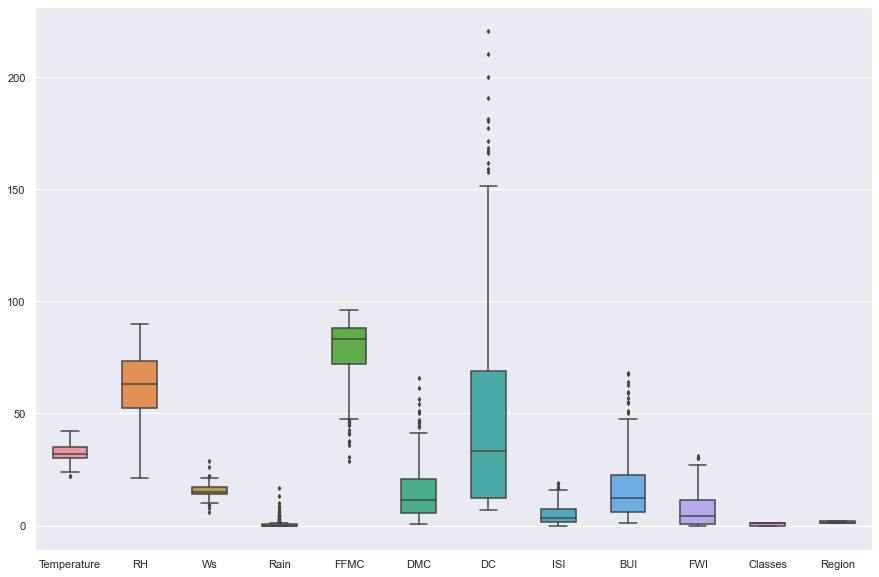

In [7]:

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df1, width= 0.5,ax=ax,  fliersize=3)

#### the above plot shows that except RH and Temp ,classes and region,other independent parametersare having ouliers .we need to remove it ,it will be removed later on

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

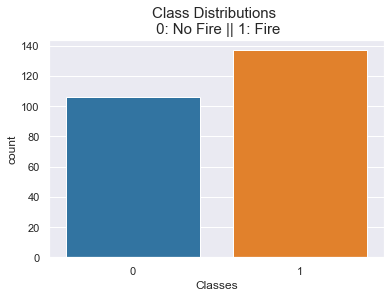

In [8]:
sns.countplot('Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=15)

In [9]:
X = df1.drop(columns = ['Classes','Region'])
Y = df1['Classes']

In [10]:
X

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5
...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7


In [11]:
scaler=StandardScaler()
X=scaler.fit_transform(X)

In [12]:
X.shape

(243, 10)

In [13]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.25, random_state = 45)

In [14]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
log_reg = LogisticRegression()

log_reg.fit(X_train,Y_train)

LogisticRegression()

In [15]:
X_train.shape

(182, 10)

In [16]:
X_test

array([[ 5.03667137e-01, -1.30711137e+00,  5.78577631e-01,
        -3.18484456e-01,  7.14407284e-01,  6.56863671e-01,
         8.63138733e-04,  3.46358924e+00,  4.16343730e-01,
         7.07930807e-01],
       [-3.00433029e-01, -5.20467329e-01, -1.63053696e+00,
        -3.66191593e-01,  2.83576068e-01, -7.00598078e-01,
        -7.18972713e-01, -5.47037153e-01, -7.43950011e-01,
        -7.24538731e-01],
       [-3.00433029e-01,  3.97284058e-01, -5.25979664e-01,
        -3.66191593e-01,  5.16088153e-01, -2.30114176e-01,
        -1.86055563e-01, -3.65937939e-02, -2.07397992e-01,
        -1.59436069e-01],
       [ 7.71700526e-01, -1.92698976e-01,  5.78577631e-01,
        -3.66191593e-01,  6.52859967e-01, -2.18672035e-02,
         9.03454960e-02,  5.22463219e-01,  4.07573168e-02,
         3.53098903e-01],
       [ 1.30776730e+00, -1.70043340e+00, -8.94165429e-01,
        -7.99487729e-02,  5.70796879e-01,  2.17231173e-01,
        -3.13319360e-01,  1.20198593e-02,  3.40504166e-02,
        -1.

In [17]:
X_train

array([[ 1.03973391,  0.00396204,  0.21039187, ...,  0.54677005,
        -0.05984619,  0.30053121],
       [-0.03239964, -0.97934302, -0.52597966, ..., -0.71718494,
        -0.70370861, -0.82967411],
       [-0.30043303, -0.45491366, -1.63053696, ...,  0.15786082,
         0.12794702,  0.14282815],
       ...,
       [-0.56846642, -1.37266504, -0.1577939 , ...,  0.88706562,
        -0.28117389,  0.36624083],
       [ 1.57580069, -1.2415577 , -0.89416543, ..., -0.15812793,
        -0.24093249, -0.26457145],
       [ 1.3077673 , -0.586021  , -0.52597966, ...,  0.78983831,
         1.89186178,  1.43073654]])

##saving the model

In [18]:

import pickle
# Writing different model files to file
with open( 'log_regress_modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

In [19]:
Y_pred = log_reg.predict(X_test)

In [20]:
print('Performace Matrics for Logistic Regression')
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred)
print('conf_mat\n',conf_mat)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy',Accuracy)

Performace Matrics for Logistic Regression
conf_mat
 [[27  2]
 [ 0 32]]
Accuracy 0.9672131147540983


#### For an imbalanced dataset, other performance metrics should be used  Precison,Recall, F1 score

In [21]:
# Precison
Precision = true_positive/(true_positive+false_positive)
print('Precision',Precision)
# Recall
Recall = true_positive/(true_positive+false_negative)
print('Recall',Recall)

# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score',F1_Score)

Precision 0.9310344827586207
Recall 1.0
F1_Score 0.9642857142857143


#### Precision or  Recall : it depends on the business requirement and type of Business .For example, if you are predicting fire, you need a 100 % recall. But suppose you are predicting whether a person is innocent or not, you need 100% precision. Can we maximise both at the same time? No,So, there is a need for a better metric then?Yes. And it’s called an F1 Score

### Creating a balanced dataset from imbalanced data:

##### 1.Use the right evaluation metrics:Confusion Matrix,Precision,Recall,F1score
##### 2.Undersampling
##### 3.Oversampling
##### 4.Creating synthetic data
##### 5.Cost sensitive learning
##### 6.Ensemble methods

#### Before changing the dataset, we must split the dataset into training and testing because the change is only for the training purpose.

### Undersampling
* resamples the majority class points in the data to make them equal to the minority class points. We will be creating a new dataset out of the original dataset using undersampling. 

In [22]:

!pip install --user imbalanced-learn

** importing UnderSampler from imbalanced learned library

In [23]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.25, random_state = 45)

In [24]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_train_US,Y_train_US =rus.fit_resample(X_train, Y_train)

In [25]:
X_train_US.shape

(154, 10)

In [26]:
Y_train_US.shape

(154,)

* Now, we can see that the X_train has fewer observations(154) than the original one (182)

In [27]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_US)
X_test=scaler.transform(X_test)
log_reg = LogisticRegression()

log_reg.fit(X_train_US,Y_train_US)

LogisticRegression()

In [28]:
X_train_US

array([[-0.04205512, -1.01645766, -0.53244583, ..., -0.70974817,
        -0.69655999, -0.82628833],
       [-0.31825498,  0.33511121,  0.53684621, ..., -0.56501911,
        -0.4923219 , -0.63774229],
       [-1.97545412,  1.0784741 , -0.17601515, ..., -1.11981387,
        -1.05573732, -0.9474965 ],
       ...,
       [-0.04205512,  0.87573876, -0.53244583, ...,  0.11038321,
        -0.17540073, -0.03170145],
       [-0.04205512,  0.26753277,  0.53684621, ...,  0.20686926,
        -0.12610188,  0.06257157],
       [-0.59445484, -1.42192833, -0.17601515, ...,  0.88227158,
        -0.25287035,  0.39926093]])

In [29]:
X_test

array([[ 5.75916879e-01, -1.32331131e+00,  5.56851627e-01,
        -3.54770173e-01,  7.96725794e-01,  7.40543070e-01,
         8.10985787e-02,  3.65743859e+00,  5.05573696e-01,
         8.11657680e-01],
       [-2.23102935e-01, -5.50159461e-01, -1.62336406e+00,
        -3.99152469e-01,  3.82989582e-01, -6.21079572e-01,
        -6.49995142e-01, -4.56026403e-01, -6.65075914e-01,
        -6.31767028e-01],
       [-2.23102935e-01,  3.51851032e-01, -5.33256219e-01,
        -3.99152469e-01,  6.06275792e-01, -1.49153543e-01,
        -1.08743437e-01,  6.75055058e-02, -1.23735054e-01,
        -6.23426018e-02],
       [ 8.42256817e-01, -2.28012856e-01,  5.56851627e-01,
        -3.99152469e-01,  7.37620621e-01,  5.97317489e-02,
         1.71980395e-01,  6.40897596e-01,  1.26635094e-01,
         4.54112110e-01],
       [ 1.37493669e+00, -1.70988724e+00, -8.96625501e-01,
        -1.32858692e-01,  6.58813723e-01,  2.99563010e-01,
        -2.37997575e-01,  1.17365688e-01,  1.19868333e-01,
         9.

In [30]:
Y_pred_US = log_reg.predict(X_test)

In [31]:
Y_pred_US

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [32]:
print('Performace Matrics for Logistic Regression:Imbalance data handling using Undersampling')
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_US)
print('conf_mat\n',conf_mat)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]
# Breaking down the formula for Accuracy
Accuracy_US = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy_US',Accuracy_US)
# Precison
Precision_US = true_positive/(true_positive+false_positive)
print('Precision_US',Precision_US)
# Recall
Recall = true_positive/(true_positive+false_negative)
print('Recall',Recall)
# F1 Score
F1_Score_US = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score_US',F1_Score_US)

Performace Matrics for Logistic Regression:Imbalance data handling using Undersampling
conf_mat
 [[26  3]
 [ 0 32]]
Accuracy_US 0.9508196721311475
Precision_US 0.896551724137931
Recall 1.0
F1_Score_US 0.9642857142857143


#### observation for Undersampling:
#### Accuracy is decreased to 0.95 and it is more meaningful now,precision become 0.89 which means out of all actual values how many are correctly predicted and F1_score 0.96.
#### The major disadvantage of undersampling is that we do not use a significant chunk of the data, which contains some information.herefore, we are losing information, and as a result, we will not get significant results.

In [33]:

import pickle
# Writing different model files to file
with open( 'log_regress_US_modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

#### Undersampling:In random undersampling method, we balance the imbalanced class distribution by choosing and eliminating observations from majority class to make the dataset balanced.
#### Advantages

* If the dataset is huge, we might face run time and storage problems. Undersampling can help to handle these problems successfully by improving run time and storage problems by reducing the number of training data samples.
#### Disadvantages

* This method can discard potentially useful information which could be important for building the classifiers.

* The sample chosen by random under sampling may be a biased one. It may not be an accurate representation of the population. So, it results in inaccurate results with the actual dataset.

### Balanced dataset from imbalanced dataset using Oversampling
* Oversampling refers to the resampling of the minority class points to equal the total number of majority points. Repetition of the minority class points is one such type of oversampling technique.

* Apart from repetition, we can provide the class weights to both the class. Providing the large weights to the minority class will give the same result as from that of repetition.

In [34]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.25, random_state = 45)

In [35]:
##importing library 
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_OS,Y_train_OS =ros.fit_resample(X_train, Y_train)

In [36]:
X_train_OS.shape

(210, 10)

In [37]:
Y_train_OS.shape

(210,)

# * Now, we can see that the new X_train has more (210)observations than the original one(182)  

##### Over-sampling increases the number of minority class members in the training set.

In [38]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_OS)
X_test=scaler.transform(X_test)
log_reg = LogisticRegression()

log_reg.fit(X_train_OS,Y_train_OS)

LogisticRegression()

In [39]:
Y_pred_OS = log_reg.predict(X_test)

In [40]:
Y_pred_OS

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [41]:
print('Performace Matrics for Logistic Regression:Imbalance data handling using Oversampling')
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_OS)
print('conf_mat\n',conf_mat)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# Breaking down the formula for Accuracy
Accuracy_OS = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy_OS',Accuracy_OS)
# Precison
Precision_OS = true_positive/(true_positive+false_positive)
print('Precision_OS',Precision_OS)
 # Recall
Recall_OS = true_positive/(true_positive+false_negative)
print('Recall_OS',Recall_OS)
# F1 Score
F1_Score_OS = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score_OS',F1_Score_OS)

Performace Matrics for Logistic Regression:Imbalance data handling using Oversampling
conf_mat
 [[25  4]
 [ 0 32]]
Accuracy_OS 0.9344262295081968
Precision_OS 0.8620689655172413
Recall_OS 1.0
F1_Score_OS 0.9642857142857143


In [42]:
###saving the model
import pickle
# Writing different model files to file
with open( 'log_regress_OS_modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

*Accuracy =0.9344 is slightly decreased now it is more meaningful now. precision is 0.86,F1 score 0.9642

#### Random oversampling: In random oversampling, we balance the data by randomly oversampling the minority class.

* Advantages:An advantage of this method is that it leads to no information loss.This method outperform under sampling.

* Disadvantages:This method increases the likelihood of overfitting as it replicates the minority class labels.

### Creating synthetic data: Synthetic Minority Oversampling Technique
* The problem with repeating the data is that it does not provide any extra information. One way to increase the information about the data is by creating synthetic data points. 
* One such technique is the SMOTE (Synthetic Minority Oversampling technique). As the name suggests, SMOTE is an oversampling technique. In layman terms, SMOTE will create synthetic data points for the minority class. It creates new instances between the points of the minority class.
* In the context of synthetic data generation, there is a powerful and widely used method known as synthetic minority oversampling technique or SMOTE. Under this technique, artificial data is created based on feature space. Artificial data is generated with bootstrapping and k-nearest neighbours algorithm. 

In [52]:
from imblearn.over_sampling import SMOTE

In [53]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size= 0.25, random_state = 45)

In [54]:
smote = SMOTE()
X_train_SMOTE,Y_train_SMOTE = smote.fit_resample(X_train,Y_train)

In [55]:
X_train_SMOTE

array([[ 1.06274431, -0.00278101,  0.18041553, ...,  0.54457042,
        -0.02046149,  0.33192306],
       [-0.04205512, -1.01645766, -0.53244583, ..., -0.70974817,
        -0.69655999, -0.82628833],
       [-0.31825498, -0.47583011, -1.60173788, ...,  0.15862624,
         0.17673391,  0.17031216],
       ...,
       [ 0.43905145, -0.3559213 , -0.0840127 , ..., -0.7579912 ,
        -0.69837786, -0.83975591],
       [ 1.19873699, -1.03515682, -0.53244583, ..., -0.66150515,
        -0.84965796, -0.82960385],
       [-1.97709379, -0.43144645,  0.8932769 , ..., -0.67792029,
        -0.74160968, -0.79967299]])

In [56]:
Y_train_SMOTE

0      1
1      0
2      1
3      1
4      0
      ..
205    0
206    0
207    0
208    0
209    0
Name: Classes, Length: 210, dtype: int64

In [57]:
X_train.shape

(182, 10)

In [58]:

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train_SMOTE)
X_test=scaler.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train_SMOTE,Y_train_SMOTE)
Y_pred_SMOTE = log_reg.predict(X_test)

In [59]:
print('Performace Matrics for Logistic Regression:Imbalance data handling using SMOTE')
# Confusion Matrix
conf_mat = confusion_matrix(Y_test,Y_pred_SMOTE)
print('conf_mat\n',conf_mat)
true_positive = conf_mat[0][0]
false_positive = conf_mat[0][1]
false_negative = conf_mat[1][0]
true_negative = conf_mat[1][1]

# Breaking down the formula for Accuracy
Accuracy_SMOTE = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
print('Accuracy_SMOTE',Accuracy_SMOTE)
# Precison
Precision_SMOTE = true_positive/(true_positive+false_positive)
print('Precision_SMOTE',Precision_SMOTE)
 # Recall
Recall_SMOTE = true_positive/(true_positive+false_negative)
print('Recall_SMOTE',Recall_SMOTE)
# F1 Score
F1_Score_SMOTE = 2*(Recall * Precision) / (Recall + Precision)
print('F1_Score_SMOTE',F1_Score_SMOTE)

Performace Matrics for Logistic Regression:Imbalance data handling using SMOTE
conf_mat
 [[26  3]
 [ 0 32]]
Accuracy_SMOTE 0.9508196721311475
Precision_SMOTE 0.896551724137931
Recall_SMOTE 1.0
F1_Score_SMOTE 0.9642857142857143


* SMOTE: Accuracy sightly decreased to 0.9508 ,gives precision 0.89 and Recall 

In [ ]:
### saving the model
import pickle
# Writing different model files to file
with open( 'log_regress_SMOTE_modelForPrediction.sav', 'wb') as f:
    pickle.dump(log_reg,f)
    
with open('sandardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)

### Conclusion
* In this jupyter notebook, I have discussed various approaches to deal with the problem of imbalanced classes. These are random oversampling, random undersampling,over-sampling : SMOTE.

* Some combination of these approaches will help us to create a better classifier. Simple sampling techniques may handle slight imbalance whereas more advanced methods like ensemble methods are required for extreme imbalances. The most effective technique will vary according to the dataset.

* So, based on the above discussion, we can conclude that there is no one solution to deal with the imbalanced classes problem. We should try out multiple methods to select the best-suited sampling techniques for the dataset in hand. The most effective technique will vary according to the characteristics of the dataset.